In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

In [23]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
df = pd.read_excel('Analysis Data.xlsx', index_col = False)

In [25]:
df.head(5)

,Specimen,b\n( in . ),h\n( in . ),d\n( in . ),#bar,D\n( in . ),ρ ratio,s ( in . ),f'c( pal ),fs( pal ),#\ncracks,Avg Space (in),Avg .\nWidth\n( In . ),Max .\nWidth\n( in . ),30⁰C,40⁰C,50⁰C,60⁰C,70⁰C,80⁰C
0,6-7.5-3-2,7.5,6,5.31,3,0.375,1.476939,2.50,3720,15000.0,1.0,NaN,0.00073,0.00073,NaN,NaN,NaN,NaN,NaN,NaN
1,6-7.5-4-1,7.5,6,5.25,2,0.500,0.962500,3.75,3550,15000.0,1.0,NaN,0.00068,0.00068,NaN,NaN,NaN,NaN,NaN,NaN
2,6-7.5-4-2,7.5,6,5.25,2,0.500,0.962500,3.75,3570,15000.0,2.0,18.25,0.00087,0.00109,0.001455,0.001820,0.002185,0.002550,0.002915,0.003280
3,6-7.5-4-3,7.5,6,5.25,2,0.500,0.962500,3.75,3810,15000.0,4.0,8.87,0.00118,0.00166,0.001837,0.002015,0.002192,0.002370,0.002547,0.002724
4,6-7.5-5-1,7.5,6,5.19,2,0.625,0.940626,3.75,3330,15000.0,9.0,3.89,0.00177,0.00281,0.002888,0.002966,0.003043,0.003121,0.003199,0.003277


In [26]:
df.columns

Index(['Specimen', 'b\n( in . )', 'h\n( in . )', 'd\n( in . )', '#bar',
       'D\n( in . )', 'ρ ratio', 's ( in . )', 'f'c( pal )', 'fs( pal )',
       '#\ncracks', 'Avg Space (in)', 'Avg .\nWidth\n( In . )',
       'Max .\nWidth\n( in . )', '30⁰C', '40⁰C', '50⁰C', '60⁰C', '70⁰C',
       '80⁰C'],
      dtype='object')

In [31]:
df.columns = df.columns.str.replace('\n', '   ').str.strip()

In [32]:
df.columns

Index(['Specimen', 'b ( in . )', 'h ( in . )', 'd ( in . )', '#bar',
       'D ( in . )', 'ρ ratio', 's ( in . )', 'f'c( pal )', 'fs( pal )',
       '# cracks', 'Avg Space (in)', 'Avg . Width ( In . )',
       'Max . Width ( in . )', '30⁰C', '40⁰C', '50⁰C', '60⁰C', '70⁰C', '80⁰C'],
      dtype='object')

In [36]:
df = df.rename(columns={
    'b ( in . )': 'width(in.)',
    'h ( in . )': 'height(in.)',
    'd ( in . )': 'depth(in.)',
    '#bar': 'bar_count',
    'D ( in . )': 'diameter(in.)',
    'ρ ratio': 'density_ratio',
    's ( in . )': 'spacing(in.)',
    "f'c( pal )": 'compressive_strength',
    'fs( pal )': 'shear_strength',
    '# cracks': 'crack_count',
    'Avg Space (in)': 'avg_spacing',
    'Avg . Width ( In . )': 'avg_width(in.)',
    'Max . Width ( in . )': 'max_width(in.)'
})

In [37]:
df.head(5)

,Specimen,width(in.),height(in.),depth(in.),bar_count,diameter(in.),density_ratio,spacing(in.),compressive_strength,shear_strength,crack_count,avg_spacing,avg_width(in.),max_width(in.),30⁰C,40⁰C,50⁰C,60⁰C,70⁰C,80⁰C
0,6-7.5-3-2,7.5,6,5.31,3,0.375,1.476939,2.50,3720,15000.0,1.0,NaN,0.00073,0.00073,NaN,NaN,NaN,NaN,NaN,NaN
1,6-7.5-4-1,7.5,6,5.25,2,0.500,0.962500,3.75,3550,15000.0,1.0,NaN,0.00068,0.00068,NaN,NaN,NaN,NaN,NaN,NaN
2,6-7.5-4-2,7.5,6,5.25,2,0.500,0.962500,3.75,3570,15000.0,2.0,18.25,0.00087,0.00109,0.001455,0.001820,0.002185,0.002550,0.002915,0.003280
3,6-7.5-4-3,7.5,6,5.25,2,0.500,0.962500,3.75,3810,15000.0,4.0,8.87,0.00118,0.00166,0.001837,0.002015,0.002192,0.002370,0.002547,0.002724
4,6-7.5-5-1,7.5,6,5.19,2,0.625,0.940626,3.75,3330,15000.0,9.0,3.89,0.00177,0.00281,0.002888,0.002966,0.003043,0.003121,0.003199,0.003277


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Specimen              408 non-null    object 
 1   width(in.)            408 non-null    float64
 2   height(in.)           408 non-null    int64  
 3   depth(in.)            408 non-null    float64
 4   bar_count             408 non-null    int64  
 5   diameter(in.)         408 non-null    float64
 6   density_ratio         406 non-null    float64
 7   spacing(in.)          408 non-null    float64
 8   compressive_strength  408 non-null    int64  
 9   shear_strength        407 non-null    float64
 10  crack_count           400 non-null    float64
 11  avg_spacing           398 non-null    float64
 12  avg_width(in.)        400 non-null    object 
 13  max_width(in.)        400 non-null    float64
 14  30⁰C                  398 non-null    float64
 15  40⁰C                  3

In [40]:
df.

,width(in.),height(in.),depth(in.),bar_count,diameter(in.),density_ratio,spacing(in.),compressive_strength,shear_strength,crack_count,avg_spacing,max_width(in.),30⁰C,40⁰C,50⁰C,60⁰C,70⁰C,80⁰C
count,408.000000,408.000000,408.000000,408.000000,408.000000,406.000000,408.000000,408.000000,407.000000,400.000000,398.000000,400.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,6.748775,13.169118,11.613456,1.759804,9.158395,2.159856,4.563113,3972.169118,29434.889435,11.637500,4.866809,0.007235,0.007365,0.007462,0.007560,0.007657,0.007754,0.007852
std,1.106713,6.100576,5.571267,0.548531,96.154643,1.282065,4.618608,989.713191,8887.643574,3.605356,2.396198,0.003677,0.003651,0.003646,0.003642,0.003639,0.003636,0.003634
min,6.000000,6.000000,5.000000,1.000000,0.375000,0.363757,2.500000,2130.000000,15000.000000,1.000000,2.880000,0.000680,0.001310,0.001643,0.001734,0.001826,0.001917,0.002008
25%,6.000000,6.000000,5.250000,1.000000,0.750000,0.962500,3.000000,3550.000000,20000.000000,9.000000,3.602500,0.004570,0.004680,0.004776,0.004853,0.004968,0.005113,0.005244
50%,6.000000,15.000000,13.000000,2.000000,0.875000,2.346268,3.750000,3860.000000,30000.000000,11.000000,4.230000,0.006685,0.006789,0.006857,0.006940,0.007029,0.007109,0.007215
75%,7.500000,15.000000,13.380000,2.000000,1.125000,2.978095,6.000000,4180.000000,35000.000000,14.000000,5.422500,0.009255,0.009364,0.009447,0.009529,0.009610,0.009689,0.009764
max,9.500000,23.000000,20.940000,3.000000,1125.000000,4.993084,66.000000,6655.000000,45000.000000,19.000000,31.600000,0.027930,0.028020,0.028110,0.028199,0.028289,0.028379,0.028469


In [22]:
df.isnull().sum()

,0
Specimen,0
b ( in . ),0
h ( in . ),0
d ( in . ),0
#bar,0
D ( in . ),0
ρ ratio,2
s ( in . ),0
f'c( pal ),0
fs( pal ),1


##raed


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
width(in.),408.0,6.748775,1.106713,6.000000,6.000000,6.000000,7.500000,9.500000
height(in.),408.0,13.169118,6.100576,6.000000,6.000000,15.000000,15.000000,23.000000
depth(in.),408.0,11.613456,5.571267,5.000000,5.250000,13.000000,13.380000,20.940000
bar_count,408.0,1.759804,0.548531,1.000000,1.000000,2.000000,2.000000,3.000000
diameter(in.),408.0,9.158395,96.154643,0.375000,0.750000,0.875000,1.125000,1125.000000
density_ratio,406.0,2.159856,1.282065,0.363757,0.962500,2.346268,2.978095,4.993084
spacing(in.),408.0,4.563113,4.618608,2.500000,3.000000,3.750000,6.000000,66.000000
compressive_strength,408.0,3972.169118,989.713191,2130.000000,3550.000000,3860.000000,4180.000000,6655.000000
shear_strength,407.0,29434.889435,8887.643574,15000.000000,20000.000000,30000.000000,35000.000000,45000.000000
crack_count,400.0,11.637500,3.605356,1.000000,9.000000,11.000000,14.000000,19.000000


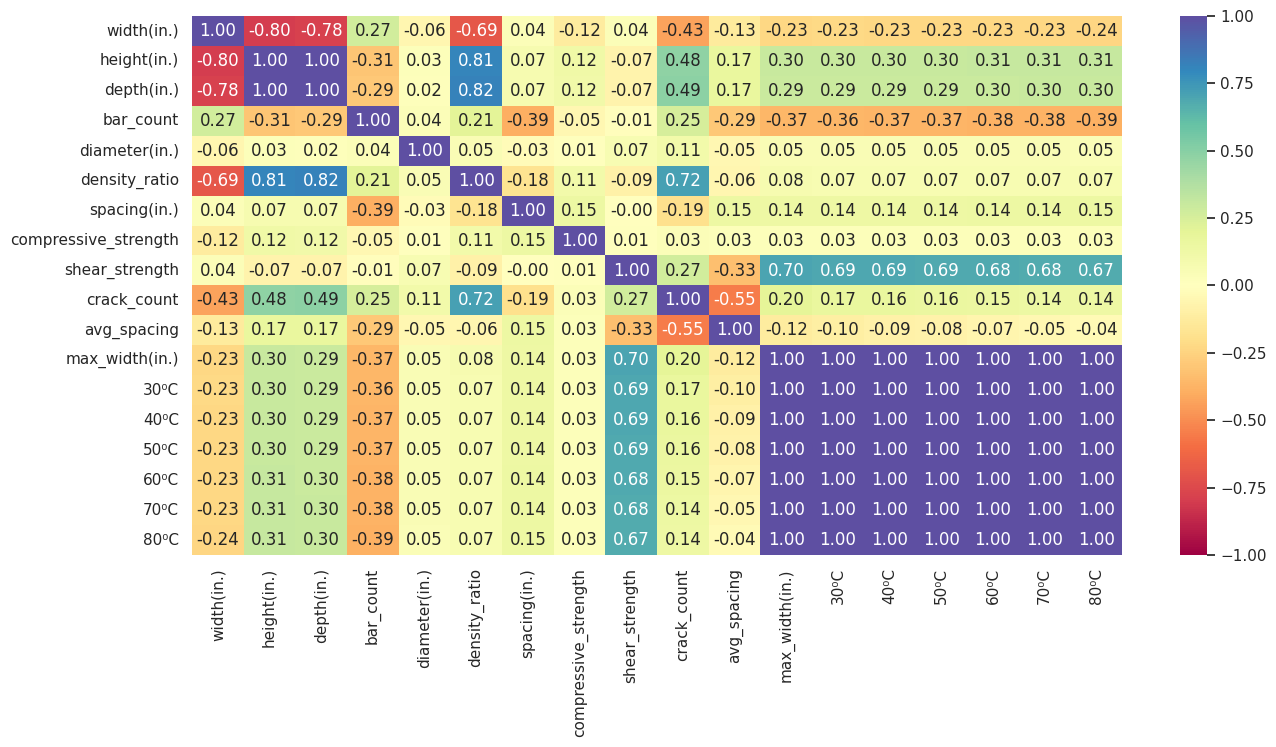

In [42]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

##uy


In [ ]:
df1 = df.copy()

In [ ]:
df1.columns

Index(['Specimen', 'b\n( in . )', 'h\n( in . )', 'd\n( in . )', '#bar',
       'D\n( in . )', '? ratio', 's ( in . )', 'f'c( pal )', 'fs( pal )',
       '#\ncracks', 'Avg Space (in)', 'Avg .\nWidth\n( In . )',
       'Max .\nWidth\n( in . )', '30?C', '40?C', '50?C', '60?C', '70?C',
       '80?C'],
      dtype='object')

In [ ]:
df1["Avg Space (in)"] = df1["Avg Space (in)"].fillna(
    value=df1.groupby(["b\n( in . )", "? ratio"])["Avg Space (in)"].transform("median"))

In [ ]:
df1["60?C"] = df1["60?C"].fillna(
    value=df1.groupby(["b\n( in . )", "h\n( in . )"])["60?C"].transform("median"))

df1["50?C"] = df1["50?C"].fillna(
    value=df1.groupby(["b\n( in . )", "h\n( in . )"])["50?C"].transform("median"))

df1["40?C"] = df1["40?C"].fillna(
    value=df1.groupby(["b\n( in . )", "h\n( in . )"])["40?C"].transform("median"))

df1["30?C"] = df1["30?C"].fillna(
    value=df1.groupby(["b\n( in . )", "h\n( in . )"])["30?C"].transform("median"))

df1["80?C"] = df1["80?C"].fillna(
    value=df1.groupby(["b\n( in . )", "h\n( in . )"])["80?C"].transform("median"))

df1["70?C"] = df1["70?C"].fillna(
    value=df1.groupby(["b\n( in . )", "h\n( in . )"])["70?C"].transform("median"))

In [ ]:
col_to_fill = ["Avg .\nWidth\n( In . )", "Max .\nWidth\n( in . )"]

# Convert columns to numeric, handling errors
for col in col_to_fill:
    # Check if the column dtype is 'object' (likely string) before using .str
    if df1[col].dtype == 'object':
        df1[col] = pd.to_numeric(df1[col].str.replace(',', '.'), errors='coerce')
    else:
        # If already numeric, no need for conversion
        df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Fill NaN values with the median for the specified columns
df1[col_to_fill] = df1[col_to_fill].apply(lambda x: x.fillna(x.median()), axis=0)

In [ ]:
df1["#\ncracks"] = df1["#\ncracks"].fillna(
    value=df1.groupby(["b\n( in . )", "h\n( in . )"])["#\ncracks"].transform("median"))
df1["? ratio"] = df1["? ratio"].fillna(
    value=df1.groupby(["b\n( in . )", "h\n( in . )"])["? ratio"].transform("median"))
df1["fs( pal )"] = df1["fs( pal )"].fillna(
    value=df1.groupby(["b\n( in . )", "h\n( in . )"])["fs( pal )"].transform("median"))

In [ ]:
df1.isnull().sum()

,0
Specimen,0
b\n( in . ),0
h\n( in . ),0
d\n( in . ),0
#bar,0
D\n( in . ),0
? ratio,0
s ( in . ),0
f'c( pal ),0
fs( pal ),0


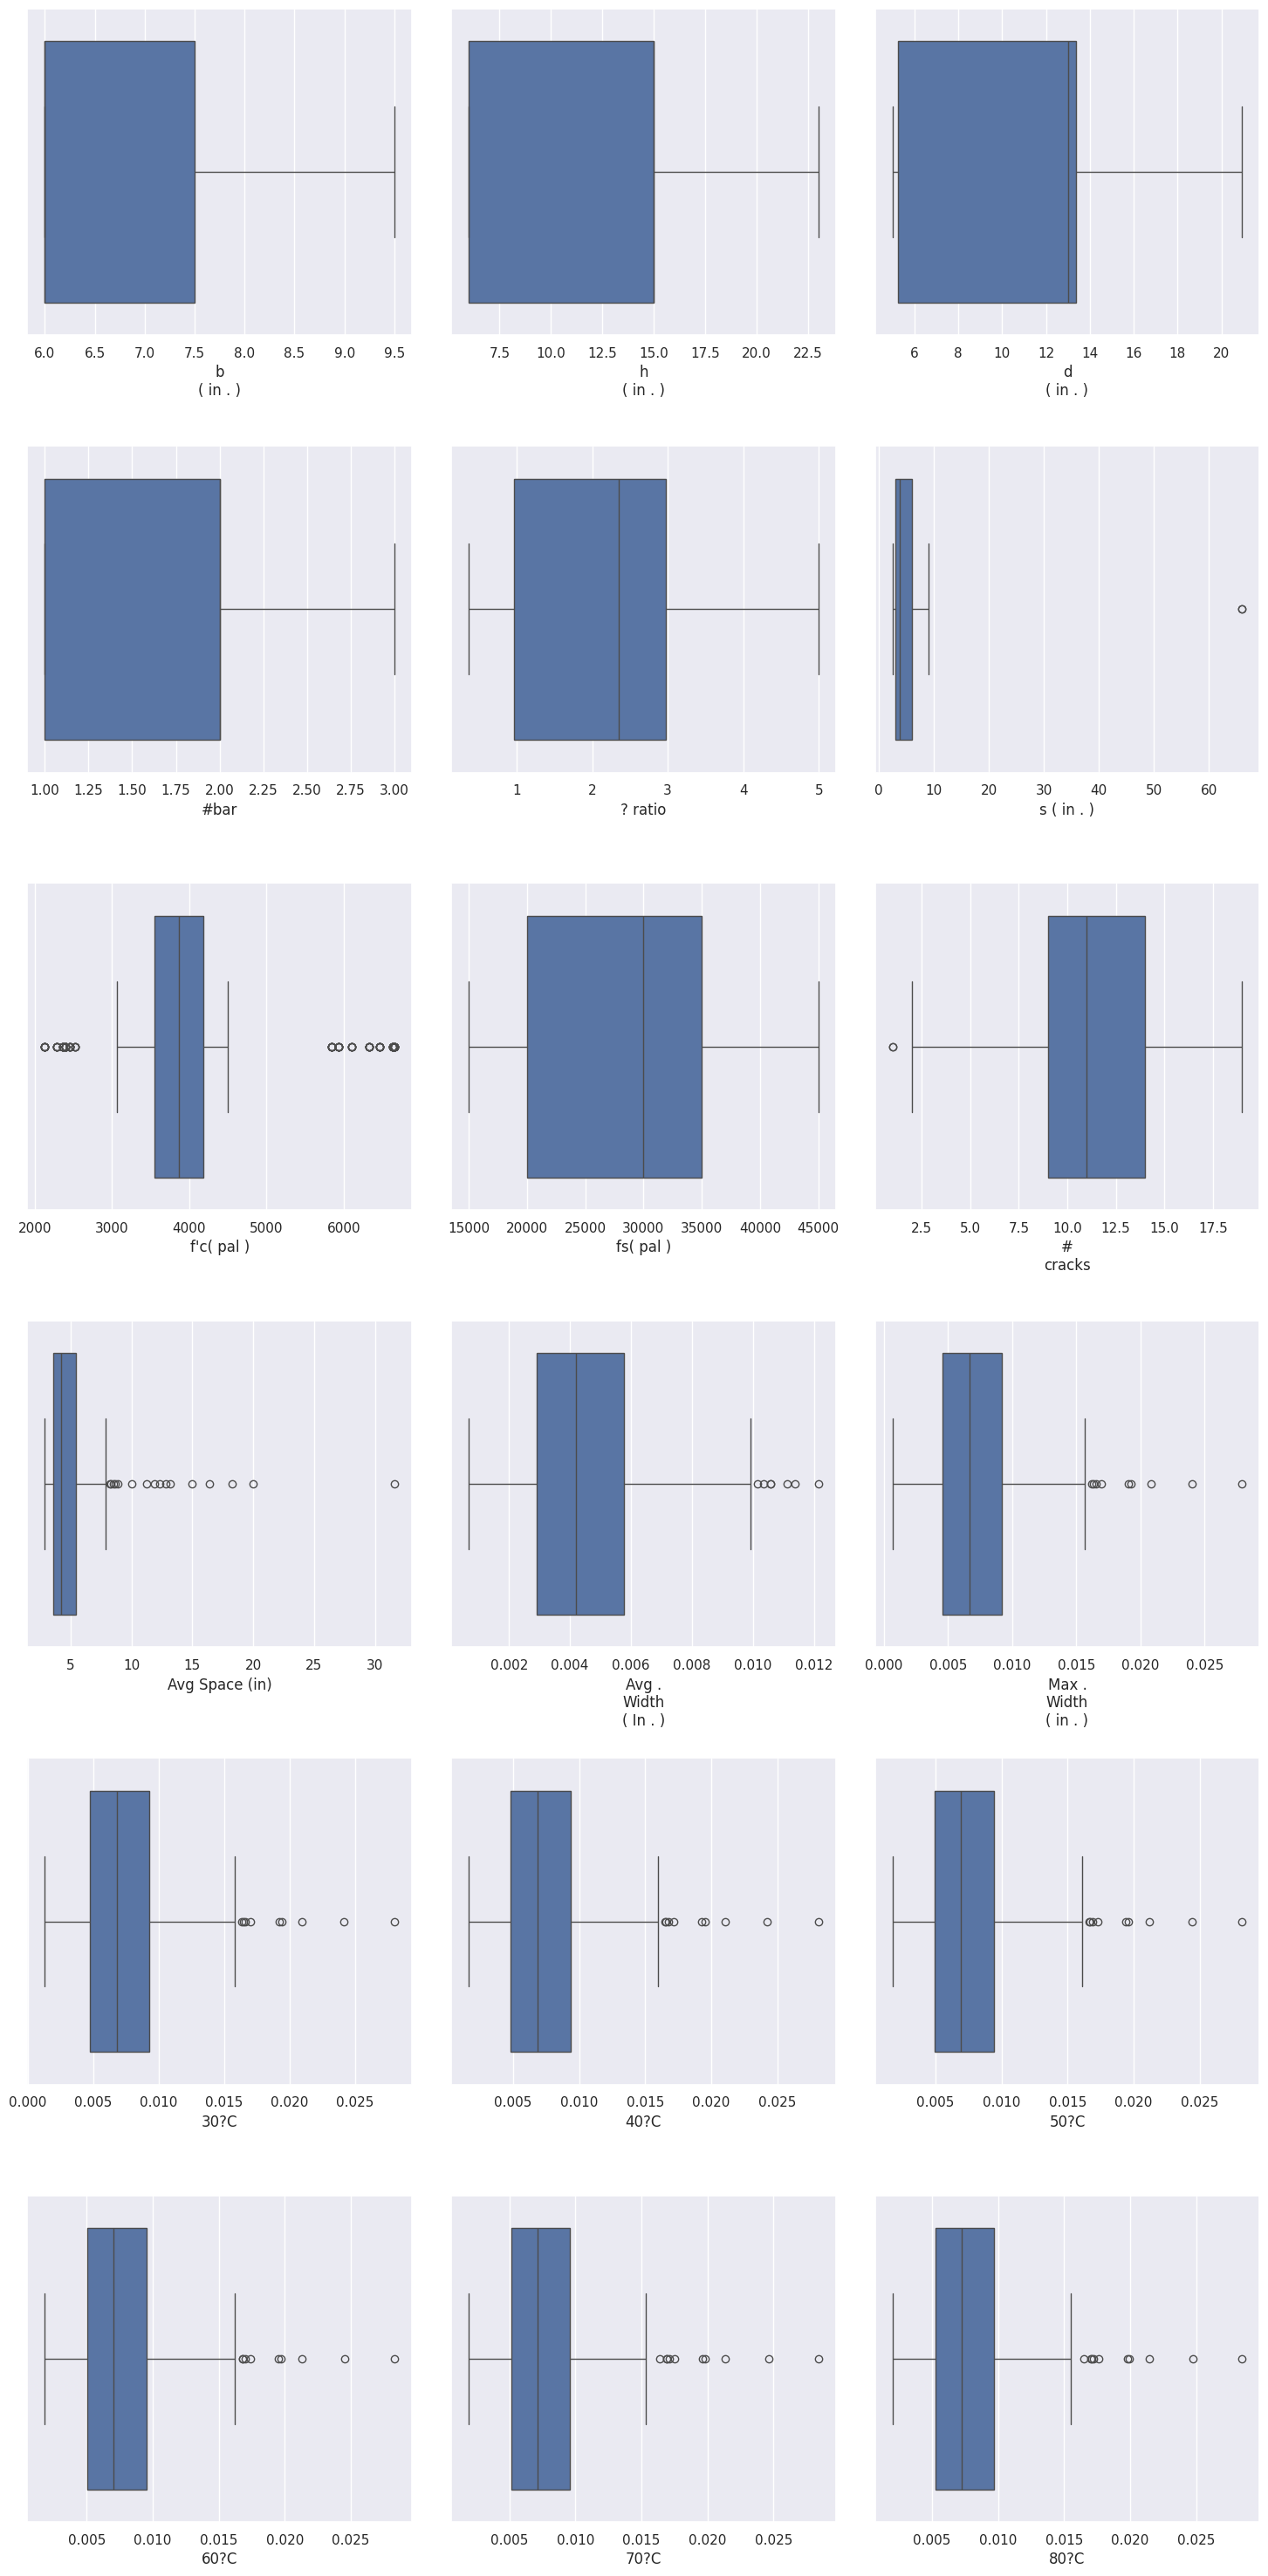

In [ ]:
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

# Calculate the number of rows and columns needed for the grid
num_rows = int(np.ceil(len(num_cols) / 3))  # Calculate rows needed

plt.figure(figsize=(15, num_rows * 5))  # Adjust figure height based on rows

for i, variable in enumerate(num_cols):
    plt.subplot(num_rows, 3, i + 1)  # Use calculated num_rows
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

###try


In [ ]:
X = df1.drop(["Max .\nWidth\n( in . )"], axis=1)
y = df1["Max .\nWidth\n( in . )"]

print(X.head())
print(y.head())

    Specimen  b\n( in . )  h\n( in . )  d\n( in . )  #bar D\n( in . )  \
0  6-7.5-3-2          7.5            6         5.31     3       0.375   
1  6-7.5-4-1          7.5            6         5.25     2         0.5   
2  6-7.5-4-2          7.5            6         5.25     2         0.5   
3  6-7.5-4-3          7.5            6         5.25     2         0.5   
4  6-7.5-5-1          7.5            6         5.19     2       0.625   

    ? ratio  s ( in . )  f'c( pal )  fs( pal )  #\ncracks  Avg Space (in)  \
0  1.476939        2.50        3720    15000.0        1.0            3.03   
1  0.962500        3.75        3550    15000.0        1.0            4.04   
2  0.962500        3.75        3570    15000.0        2.0           18.25   
3  0.962500        3.75        3810    15000.0        4.0            8.87   
4  0.940626        3.75        3330    15000.0        9.0            3.89   

   Avg .\nWidth\n( In . )      30?C      40?C      50?C      60?C      70?C  \
0                 0

In [ ]:
# Creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,b\n( in . ),h\n( in . ),d\n( in . ),#bar,? ratio,s ( in . ),f'c( pal ),fs( pal ),#\ncracks,Avg Space (in),...,Specimen_CKIS,D\n( in . )_0.5,D\n( in . )_0.625,D\n( in . )_0.75,D\n( in . )_0.875,D\n( in . )_1,"D\n( in . )_1,125",D\n( in . )_1.125,D\n( in . )_1.25,D\n( in . )_1.375
0,7.5,6,5.31,3,1.476939,2.50,3720,15000.0,1.0,3.03,...,False,False,False,False,False,False,False,False,False,False
1,7.5,6,5.25,2,0.962500,3.75,3550,15000.0,1.0,4.04,...,False,True,False,False,False,False,False,False,False,False
2,7.5,6,5.25,2,0.962500,3.75,3570,15000.0,2.0,18.25,...,False,True,False,False,False,False,False,False,False,False
3,7.5,6,5.25,2,0.962500,3.75,3810,15000.0,4.0,8.87,...,False,True,False,False,False,False,False,False,False,False
4,7.5,6,5.19,2,0.940626,3.75,3330,15000.0,9.0,3.89,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
# Identify and replace inf and NaN values in X before adding constant and splitting
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
X = X.fillna(X.median())  # Fill NaN with median of each column

In [ ]:
# Adding a constant to X to represent intercept
X = sm.add_constant(X)

# Splitting the data in 80:20 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Convert X_train to float (if necessary)
X_train = X_train.astype(float)


In [ ]:
# Fitting the OLS model
olsmodel = sm.OLS(y_train, X_train).fit()  # Using X_train instead of X_train1
print(olsmodel.summary())

                             OLS Regression Results                             
Dep. Variable:     Max .
Width
( in . )   R-squared:                       0.992
Model:                              OLS   Adj. R-squared:                  0.989
Method:                   Least Squares   F-statistic:                     387.3
Date:                  Fri, 24 Jan 2025   Prob (F-statistic):          6.75e-194
Time:                          13:50:01   Log-Likelihood:                 1895.5
No. Observations:                   285   AIC:                            -3651.
Df Residuals:                       215   BIC:                            -3395.
Df Model:                            69                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.000313,0.000178,0.992019,0.988494,5.89734


In [ ]:
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.000635,0.000302,0.973699,0.908322,4.885031


###Test for multicolinearity


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif
checking_vif(X_train)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,const,0.0
1,b\n( in . ),inf
2,h\n( in . ),inf
3,d\n( in . ),inf
4,#bar,inf
...,...,...
82,D\n( in . )_1,inf
83,"D\n( in . )_1,125",NaN
84,D\n( in . )_1.125,inf
85,D\n( in . )_1.25,inf


##Removing colinearity


In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ['80?C','? ratio','Avg . Width ( In . )']

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,? ratio,0.989496,0.000359
1,Avg . Width ( In . ),0.989457,0.000360
2,80?C,0.987128,0.000398


In [ ]:
col_to_drop = "80?C"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF after dropping  80?C


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,const,0.0
1,b\n( in . ),inf
2,h\n( in . ),inf
3,d\n( in . ),inf
4,#bar,inf
...,...,...
81,D\n( in . )_1,inf
82,"D\n( in . )_1,125",NaN
83,D\n( in . )_1.125,inf
84,D\n( in . )_1.25,inf


In [ ]:
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(olsres_1.summary())

                             OLS Regression Results                             
Dep. Variable:     Max .
Width
( in . )   R-squared:                       0.990
Model:                              OLS   Adj. R-squared:                  0.987
Method:                   Least Squares   F-statistic:                     321.3
Date:                  Fri, 24 Jan 2025   Prob (F-statistic):          1.20e-185
Time:                          13:50:40   Log-Likelihood:                 1866.4
No. Observations:                   285   AIC:                            -3595.
Df Residuals:                       216   BIC:                            -3343.
Df Model:                            68                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

In [ ]:
# initial list of columns
predictors = X_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['b\n( in . )', 'h\n( in . )', 'd\n( in . )', '#bar', '? ratio', 'fs( pal )', '#\ncracks', 'Avg .\nWidth\n( In . )', '60?C', 'Specimen_15-6-7-1', 'Specimen_15-6-7-5', 'Specimen_15-6-8-3', 'Specimen_15-6-8-4', 'Specimen_15-6-9-1', 'Specimen_15-6-9-2', 'Specimen_23-6-10-1', 'Specimen_23-6-10-2', 'Specimen_23-6-11-1', 'Specimen_6-7.5-3-2', 'Specimen_6-7.5-5-1', 'Specimen_6-9-8-1', 'Specimen_6-9-8-2', 'Specimen_CK12', 'Specimen_CK13', 'Specimen_CK14', 'D\n( in . )_0.875', 'D\n( in . )_1,125']


In [ ]:
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

In [ ]:
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2= olsmod_2.fit()
print(olsres_2.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Max .
Width
( in . )   R-squared (uncentered):                   0.998
Model:                              OLS   Adj. R-squared (uncentered):              0.997
Method:                   Least Squares   F-statistic:                              4237.
Date:                  Fri, 24 Jan 2025   Prob (F-statistic):                        0.00
Time:                          13:50:53   Log-Likelihood:                          1838.0
No. Observations:                   285   AIC:                                     -3624.
Df Residuals:                       259   BIC:                                     -3529.
Df Model:                            26                                                  
Covariance Type:              nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [ ]:
df1_pred = pd.DataFrame()

df1_pred["Actual Values"] = y_train.values.flatten()  # actual values
df1_pred["Fitted Values"] = olsres_2.fittedvalues.values  # predicted values
df1_pred["Residuals"] = olsres_2.resid.values  # residuals

df1_pred.head()

,Actual Values,Fitted Values,Residuals
0,0.00323,0.002731,0.000499
1,0.00991,0.009534,0.000376
2,0.01427,0.014265,0.000005
3,0.00528,0.005364,-0.000084
4,0.01055,0.010574,-0.000024


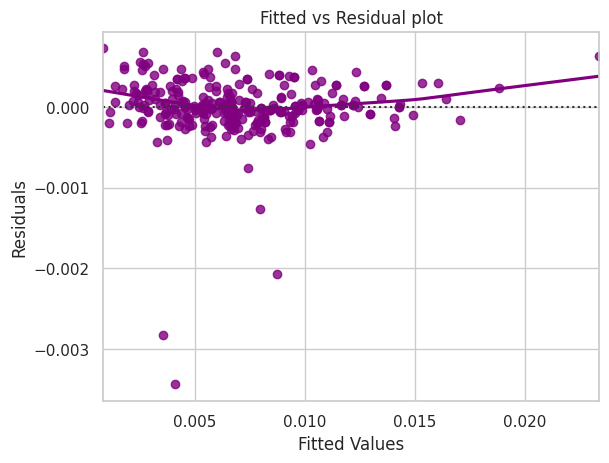

In [ ]:
sns.set_style("whitegrid")
sns.residplot(
    data=df1_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

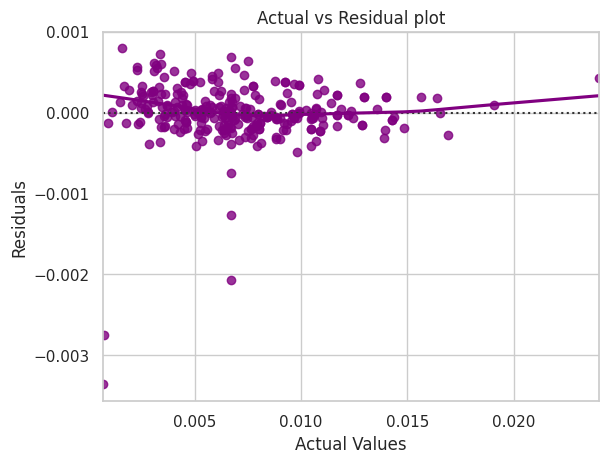

In [ ]:
sns.set_style("whitegrid")
sns.residplot(
    data=df1_pred, x="Actual Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Actual vs Residual plot")
plt.show()

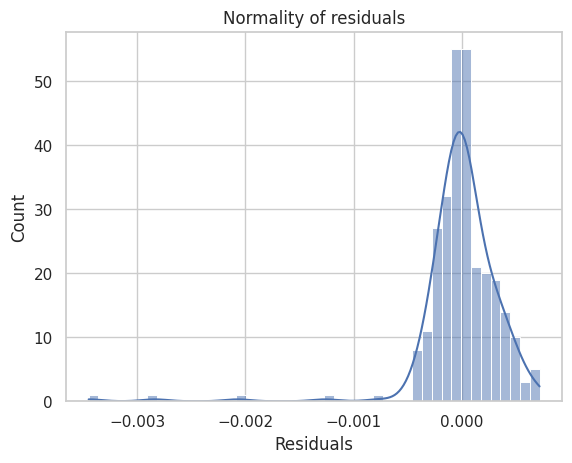

In [ ]:
sns.histplot(df1_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()